In [1]:
__author__ = 'suvrat'

from csv import DictReader
import pandas as pd

def filterCategorical(data, column, value):
    counts = dict(data[column].value_counts())
    for itr in counts:
        if counts[itr] < value:
            counts[itr] = -1
    result = []
    for index, row in data.iterrows():
        if counts[row[column]] == -1:
            result.extend(['event_other'])
        else:
            result.extend([row[column]])
    data[column] = result
    return data

origFile = './air/event_type.csv'
csvFile = './air/event_type_filtered.csv'
actionType = []
fieldName = 'event_type'
idField = 'id'
totalTime = []

data = pd.read_csv(origFile)
data = filterCategorical(data, 'event_type', 0)
data.to_csv(csvFile, index=False)

for e, row in enumerate( DictReader(open(csvFile)) ):
    if not(row[fieldName] in actionType):
        actionType.append(row[fieldName])
    
#print actionType

id = '6597'
outFile = './air/eventFreq.csv'
freq = [0] * len(actionType)

with open(outFile,"wb") as outfile:
    outfile.write("%s,%s\n" % (idField,','.join(actionType)))
    for e, row in enumerate( DictReader(open(csvFile)) ):
        if row[idField] == id:
            freq[actionType.index(row[fieldName])] += 1
        else:
            outfile.write("%s,%s\n" % (id,','.join([str(i) for i in freq])))
            freq = [0] * len(actionType)
            id = row[idField]
            freq[actionType.index(row[fieldName])] += 1
    


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


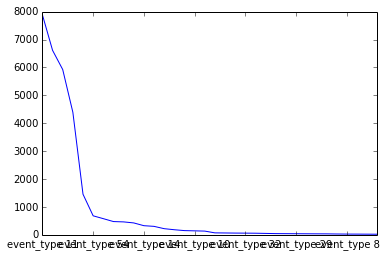

In [2]:
%matplotlib inline
import pandas as pd
data = pd.read_csv(outFile)
data = data.drop('id', axis=1)
data = data.sum()
data.columns = ['event', 'count']
data.sort(['count'], ascending=False, inplace=True)
data.plot()

In [2]:
%matplotlib inline
import pandas as pd

data = pd.read_csv(origFile)
groupData = data.groupby(['id']).count()['event_type']
#print groupData
groupData.to_csv('./air/eventGroup.csv')